In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def s1(x):
    return 2*np.sin(2*np.pi*3*x)

def plot_signal(s, a=0, b=10, N=1000):
    fig = plt.figure()
    Ts = np.linspace(a,b,N)
    plt.plot(Ts, [s(t) for t in Ts])
    plt.grid()

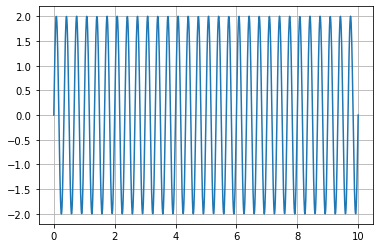

In [3]:
plot_signal(s1)

In [178]:
def plot_courbe_enroulee(v, s, N=1000, a=0, b=10):
    plt.figure()
    Ts = np.linspace(a,b,N)
    st = np.array([s(t) for t in Ts])
    pts = np.array([[st[i]*np.cos(2*np.pi*v*Ts[i]),
                     st[i]*np.sin(2*np.pi*v*Ts[i])] for i in range(N)])
    plt.plot(pts[:,0], pts[:,1])
    amplitude = np.max(abs(st))
    plt.xlim(-amplitude,amplitude)
    plt.ylim(-amplitude,amplitude)
    plt.grid()
    
    m = np.mean(pts, 0)
    plt.plot(m[0], m[1], 'ro')

In [179]:
plot_courbe_enroulee(6.4, s1, 1000, 0, 10)

FigureCanvasNbAgg()

In [180]:
def centre(v, s, N=1000, a=0, b=10):
    Ts = np.linspace(a,b,N)
    st = np.array([s(t) for t in Ts])
    pts = np.array([[st[i]*np.cos(2*np.pi*v*Ts[i]),
                     st[i]*np.sin(2*np.pi*v*Ts[i])] for i in range(N)])
    return np.mean(pts, 0)

In [181]:
def plot_fourier(s, a, b, N, v0=0, vmax=10, nb_pts=100):
    Ts = np.linspace(a,b,N)
    st = s(Ts)
    Vs = np.linspace(v0,vmax,nb_pts)
    mxs = []
    mys = []
    for v in Vs:
        m = np.mean(np.array([[st[i]*np.cos(2*np.pi*v*Ts[i]),
                 st[i]*np.sin(2*np.pi*v*Ts[i])] for i in range(N)]), 0)
        mxs.append(m[0])
        mys.append(m[1])
    mxs = np.array(mxs)
    mys = np.array(mys)
    fig = plt.figure()
    plt.plot(Vs, mxs, label='x')
    plt.plot(Vs, mys, label='y')
    plt.plot(Vs, (mxs**2 + mys**2)**0.5, label="d")
    plt.legend()
    plt.xticks(range(vmax+1))
    plt.grid()
    


In [182]:
plot_fourier(s1,0,10,1000)

FigureCanvasNbAgg()

In [189]:
def plot_fourier2(s, a, b, N, vmax = 10):
    Ts = np.linspace(a,b,N)
    st = s(Ts)
    Vs = np.arange(0, vmax, (N-1)/b/N)
    mxs = []
    mys = []
    for v in Vs:
        m = np.mean(np.array([[st[i]*np.cos(2*np.pi*v*Ts[i]),
                 st[i]*np.sin(2*np.pi*v*Ts[i])] for i in range(N)]), 0)
        mxs.append(m[0])
        mys.append(m[1])
    mxs = np.array(mxs)
    mys = np.array(mys)
    fig = plt.figure()
    plt.plot(Vs, mxs, label='x')
    plt.plot(Vs, mys, label='y')
    plt.plot(Vs, (mxs**2 + mys**2)**0.5, label="d")
    plt.legend()
    plt.xticks(range(vmax+1))
    plt.grid()

In [190]:
plot_fourier2(s1,0,10,1000)

FigureCanvasNbAgg()

In [244]:
def plot_fourier3(s, N=1000, a=0, b=10, fmax=10):
    fig = plt.figure()
    Ts = np.linspace(a,b,N)
    Fs = np.linspace(0, N/(b-a)/2, N//2+1)
    st = np.array([s(t) for t in Ts])
    ft = 2*np.fft.rfft(st) / N
    ymax = int(np.rint(np.max(np.abs(ft)))) #pour l'espacement vertical de la grille
    ymin = int(np.rint(min(np.min(ft.real), np.min(ft.imag))))
    plt.grid()
    plt.xlim(0,fmax)
    plt.plot(Fs, ft.real)
    plt.plot(Fs, ft.imag)
    plt.plot(Fs, np.abs(ft))
    plt.xticks(range(fmax+1)) #pour l'espacement dans la grille
    plt.yticks(range(ymin, ymax+1))
    return ft

In [245]:
def s2(t):
    return 5*np.sin(2*np.pi*2*t) + 3*np.sin(2*np.pi*4*t) + 2*np.sin(2*np.pi*5*t) + np.sin(2*np.pi*7*t)

In [248]:
plot_signal(s2)

FigureCanvasNbAgg()

In [246]:
ft = plot_fourier3(s2)

FigureCanvasNbAgg()

In [247]:
def s3(t):
    if t < 3:
        return np.sin(2*np.pi*2*t)
    if t < 6:
        return np.sin(2*np.pi*2*t) + 0.5*np.sin(2*np.pi*8*t)
    else:
        return 3*np.sin(2*np.pi*5*t)

In [249]:
plot_signal(s3)

FigureCanvasNbAgg()

In [252]:
ft = plot_fourier3(s3)

FigureCanvasNbAgg()

In [253]:
def s4(t):
    if t < 2:
        return 0
    else:
        return np.exp(2-t) * np.sin(2*np.pi*2*t)

In [261]:
plot_signal(s4)

FigureCanvasNbAgg()

In [172]:
N = 5000
fs = plot_rfft(s4, N)

FigureCanvasNbAgg()

In [264]:
plt.figure()
Ts = np.linspace(0, 10, N)
plt.plot(Ts, np.fft.irfft(fs*N/2)) #multiplié par N/2 pour récuperer la normalisation faite dans plot_fourier3
plt.grid()

FigureCanvasNbAgg()